# Best Response Dynamics

Author: Yuya Furusawa

*Graduate School of Economics, University of Tokyo*

This note demonstrates the best response dynamics model and its related models with `quantecon.game_theory` Python library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.game_theory.brd import BRD, KMR, SamplingBRD

## Best Response Dynamics

In evolutionary game theory, best response dynamics represents a class of strategy updating rules, where each player's strategy in the next round is determined by their best response to subset of population.

## Kandori-Mailath-Rob model (KMR model)

Kandori, Mailath and Rob(1993) consider the evolutional model with noises or mutations.

### Coordination Game

In [2]:
coordination_game_matrix = [[2, 0], [0, 1]]
N = 10
kmr = KMR(coordination_game_matrix, N=N)

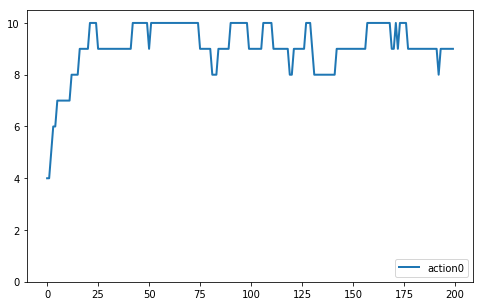

In [3]:
ts_length = 200
m = 4
x = kmr.time_series(ts_length, init_action_dist=[m, N-m])

fig, ax = plt.subplots(figsize=(8, 5))
action = 0
ax.plot(x[:, action], linewidth=2, label='action{0}'.format(action))
ax.set_ylim(0, N+0.5)
plt.legend(loc=4)
plt.show()

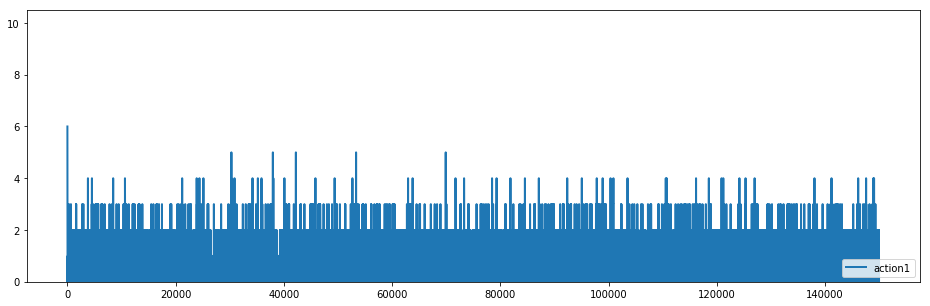

In [4]:
ts_length = 150000
m = 4
y = kmr.time_series(ts_length, init_action_dist=[m, N-m])

fig, ax = plt.subplots(figsize=(16, 5))
action = 1
ax.plot(y[:, action], linewidth=2, label='action{0}'.format(action))
ax.set_ylim(0, N+0.5)
plt.legend(loc=4)
plt.show()

## Sampling Best Response Dynamics

### Coordination Game

In [5]:
coordination_game_matrix = [[4, 0], [3, 2]]
N = 20
sbrd0 = SamplingBRD(coordination_game_matrix, N=N)

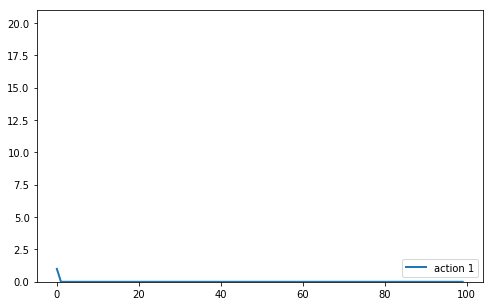

In [6]:
ts_length = 100
m = 1
x = sbrd0.time_series(ts_length, init_action_dist=[N-m, m])
action = 1

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x[:, action], linewidth=2, label='action {0}'.format(action))
ax.set_ylim(0, N+1)
plt.legend(loc=4)
plt.show()

### Young's Game

In [7]:
young_game_matrix = [[6, 0, 0],
                     [5, 7, 5],
                     [0, 5, 8]]
N = 20
sbrd1 = SamplingBRD(young_game_matrix, N=N)

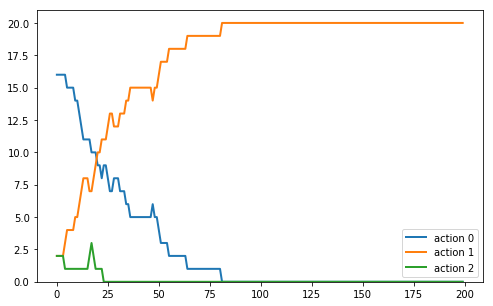

In [8]:
ts_length = 200
m = 2
x = sbrd1.time_series(ts_length, init_action_dist=[N-2*m, m, m])

fig, ax = plt.subplots(figsize=(8, 5))
for h in range(sbrd1.num_actions):
    ax.plot(x[:, h], linewidth=2, label='action {0}'.format(h))
ax.set_ylim(0, N+1)
plt.legend(loc=4)
plt.show()

---

## Reference

- Kandori, Mailath and Rob(1993), "Learning, Mutation, and Long Run Equilibria in Games.", Econometrica, vol.61, No.1, 26-59
- Oyama, Sandholm and Tercieux(2015), "Sampling best response dynamics and deterministic equilibirum selection", Theoretical Economics, 10, 243-281